# Task 05

Lung fields segmentation on chest X-ray images with the help of deep learning method

### Data set:

Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification
(https://data.mendeley.com/datasets/rscbjbr9sj/2)

### Import library

In [3]:
import numpy as np
import pandas as pd

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as pimg

In [5]:
import tensorflow as tf

In [6]:
from tensorflow import keras

In [7]:
import os

In [8]:
import cv2

### Load Dataset

In [9]:
pwd

'C:\\Users\\anura\\jupyter_tf'

In [10]:
print(os.listdir("chest_xray/"))

['.DS_Store', 'test', 'train']


In [11]:
print(os.listdir("chest_xray/train/"))

['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [12]:
TRAIN_DIR = 'chest_xray/train/'
TEST_DIR = 'chest_xray/test/'

In [13]:
main_path = "chest_xray"
train_path = main_path + "/train/"

test_path = main_path + "/test/"

train_n = train_path + "NORMAL"
train_p = train_path + "PNEUMONIA"

test_n = test_path + "NORMAL"
test_p = test_path + "PNEUMONIA"

In [14]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [15]:
# get the data, label it and normalize it
train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(64,64), classes= ["NORMAL","PNEUMONIA"],batch_size= 10)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(64,64), classes= ["NORMAL","PNEUMONIA"], batch_size= 10)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
len(train_batches.labels)

5232

In [17]:
len(test_batches.labels)

624

In [18]:
#tensorflow and keras
from keras.models import Sequential
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [19]:
# taken from https://github.com/smileservices/keras_utils/blob/master/utils.py
# plot images with labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

Found 5232 images belonging to 2 classes.


C:\Users\anura\Anaconda3\envs\AntonioEnv\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


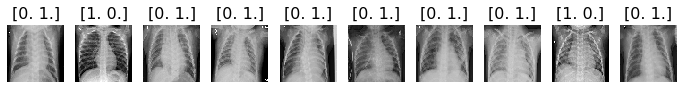

In [20]:
show_images = ImageDataGenerator().flow_from_directory(train_path, target_size=(64,64), classes= ["NORMAL","PNEUMONIA"],batch_size= 10)
imgs, labels = show_images[8]
plots(imgs, titles = labels)

In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
    MaxPool2D(pool_size = (3, 3)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPool2D(pool_size = (2, 2)),
    Flatten(),
    Dense(16, activation="relu"),
    Dense(2,activation="relu")
])
model.compile(optimizer = "sgd", loss = "mean_squared_error", metrics = ["accuracy"])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                41488     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total para

In [23]:
con_network = model.fit_generator(train_batches, steps_per_epoch=(5232/10),epochs= 5,validation_data=test_batches, validation_steps=100 ,verbose = 2)




Epoch 1/5





 - 179s - loss: 0.1681 - acc: 0.7943 - val_loss: 0.2208 - val_acc: 0.6499
Epoch 2/5
 - 138s - loss: 0.0808 - acc: 0.9145 - val_loss: 0.1471 - val_acc: 0.7692
Epoch 3/5
 - 128s - loss: 0.0539 - acc: 0.9492 - val_loss: 0.1306 - val_acc: 0.8119
Epoch 4/5
 - 177s - loss: 0.0434 - acc: 0.9561 - val_loss: 0.1399 - val_acc: 0.8057
Epoch 5/5
 - 131s - loss: 0.0393 - acc: 0.9601 - val_loss: 0.2074 - val_acc: 0.7113


In [24]:
accuracy_test = model.evaluate_generator(test_batches,steps=624)

In [25]:
print(f"The test accuracy is: {accuracy_test[1]*100}")

The test accuracy is: 71.77993545206233


In [26]:
### plotting Accuracy

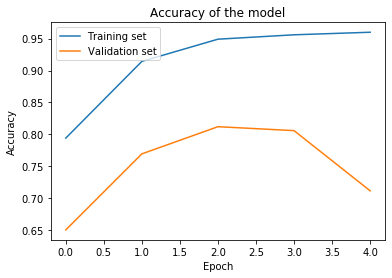

In [27]:
plt.plot(con_network.history["acc"])
plt.plot(con_network.history["val_acc"])
plt.title("Accuracy of the model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training set","Validation set"], loc = "upper left")
plt.show()

In [28]:
### Plotting loss

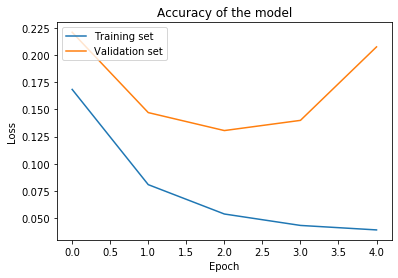

In [29]:
plt.plot(con_network.history["loss"])
plt.plot(con_network.history["val_loss"])
plt.title("Accuracy of the model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training set","Validation set"], loc = "upper left")
plt.show()